# Import Libraries

In [26]:

import umap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import random
import os

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
os.environ['PYTHONHASHSEED'] = '0'
# Setting the seed for numpy-generated random numbers
np.random.seed(67)

In [3]:
q = pd.read_csv("pcawg_mutations_complete.csv")
q = q.drop("guid",axis=1)

# Remove Classes with Less than 36 Examples

In [4]:
good_classes = q.iloc()[:,0].value_counts()[q.iloc()[:,0].value_counts() > 35]
good_classes = list(good_classes.keys())
good_classes

['Liver-HCC',
 'Prost-AdenoCA',
 'Panc-AdenoCA',
 'Breast-AdenoCA',
 'CNS-Medullo',
 'Kidney-RCC',
 'Ovary-AdenoCA',
 'Skin-Melanoma',
 'Lymph-BNHL',
 'Eso-AdenoCA',
 'Lymph-CLL',
 'CNS-PiloAstro',
 'Panc-Endocrine',
 'Stomach-AdenoCA',
 'ColoRect-AdenoCA',
 'Head-SCC',
 'Myeloid-MPN',
 'Uterus-AdenoCA',
 'Thy-AdenoCA',
 'Lung-SCC',
 'Kidney-ChRCC',
 'Bone-Osteosarc',
 'CNS-GBM',
 'Lung-AdenoCA']

In [5]:
q = q[q.iloc()[:,0].isin(good_classes)]
labels = q.iloc()[:,0]

In [6]:
q=q.drop('Unnamed: 0',axis=1)

# Run UMAP

In [90]:
embedding = umap.UMAP(n_neighbors=70,min_dist=0.15).fit_transform(q)

In [91]:
allsums = q.iloc()[:,:2897].sum(axis=1)

In [92]:
q_norm = q.iloc()[:,:2897].div(allsums, axis=0)

In [93]:

le = preprocessing.LabelEncoder()
le.fit(labels.values)


LabelEncoder()

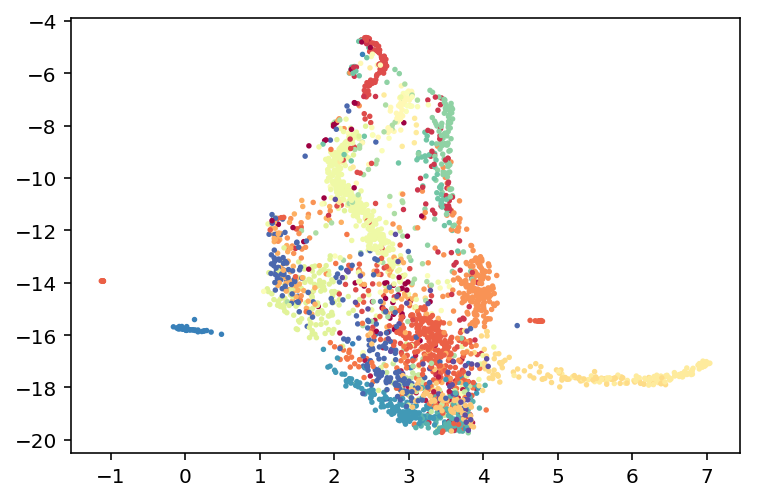

In [94]:
fig, ax = plt.subplots()
ax.scatter(embedding[:, 0], embedding[:, 1],s= 3,cmap='Spectral', c=np.abs(np.subtract(le.transform(labels.values),len(le.classes_) - 1)))
plt.show()

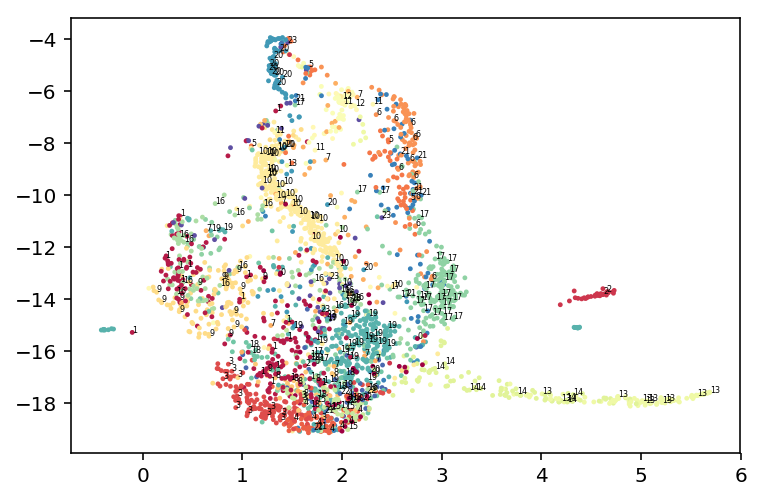

In [28]:
fig, ax = plt.subplots()
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2,cmap='Spectral', c=le.transform(labels.values))

for i, txt in enumerate(le.transform(labels.values)):
    if random.randint(1,9) == 1:
        ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]),size=4)

plt.show()

## List of all Classes

In [29]:
[(i,j) for i,j in enumerate(le.classes_)]

[(0, 'Bone-Osteosarc'),
 (1, 'Breast-AdenoCA'),
 (2, 'CNS-GBM'),
 (3, 'CNS-Medullo'),
 (4, 'CNS-PiloAstro'),
 (5, 'ColoRect-AdenoCA'),
 (6, 'Eso-AdenoCA'),
 (7, 'Head-SCC'),
 (8, 'Kidney-ChRCC'),
 (9, 'Kidney-RCC'),
 (10, 'Liver-HCC'),
 (11, 'Lung-AdenoCA'),
 (12, 'Lung-SCC'),
 (13, 'Lymph-BNHL'),
 (14, 'Lymph-CLL'),
 (15, 'Myeloid-MPN'),
 (16, 'Ovary-AdenoCA'),
 (17, 'Panc-AdenoCA'),
 (18, 'Panc-Endocrine'),
 (19, 'Prost-AdenoCA'),
 (20, 'Skin-Melanoma'),
 (21, 'Stomach-AdenoCA'),
 (22, 'Thy-AdenoCA'),
 (23, 'Uterus-AdenoCA')]

## By Log Number of Mutations

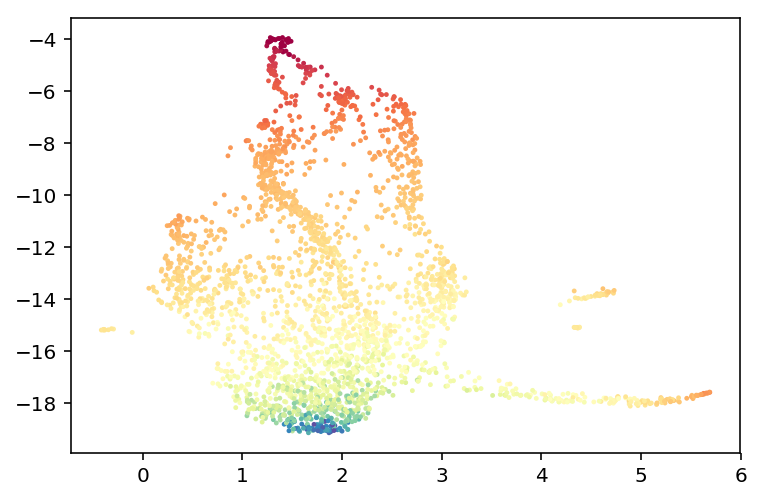

In [57]:
fig, ax = plt.subplots()
plot_colors = np.log(np.add(allsums,1))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2, c=-plot_colors, cmap='Spectral')
# new colors
plt.show()


## By Mutation Proportion in "chr8.111"

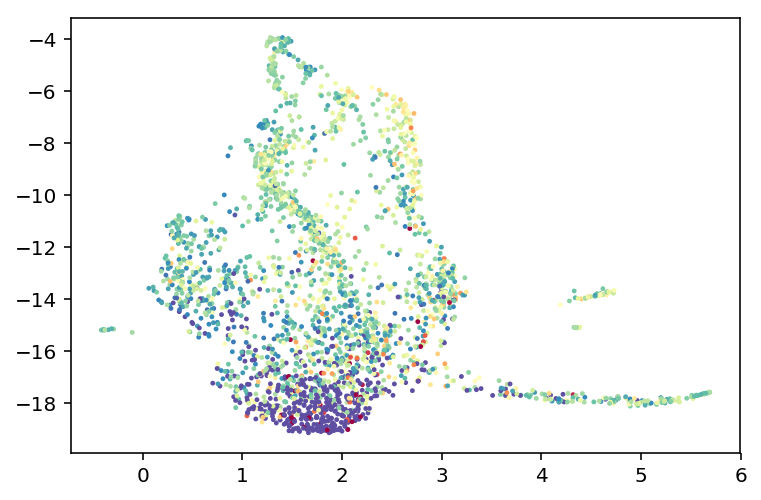

In [52]:
fig, ax = plt.subplots()
plot_colors = (np.add(q_norm["chr8.111"],0))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2, c= -plot_colors, cmap='Spectral')
# stomach adeno ca, Liver-HCC

plt.show()


In [32]:
#pearson
print(np.corrcoef(allsums, q["chr8.111"])[1,0])
print(np.corrcoef(allsums, q["chr4.11"])[1,0])

0.945565303513927
0.9622244896078842


## By Mutation Proportion in "chr14.106"

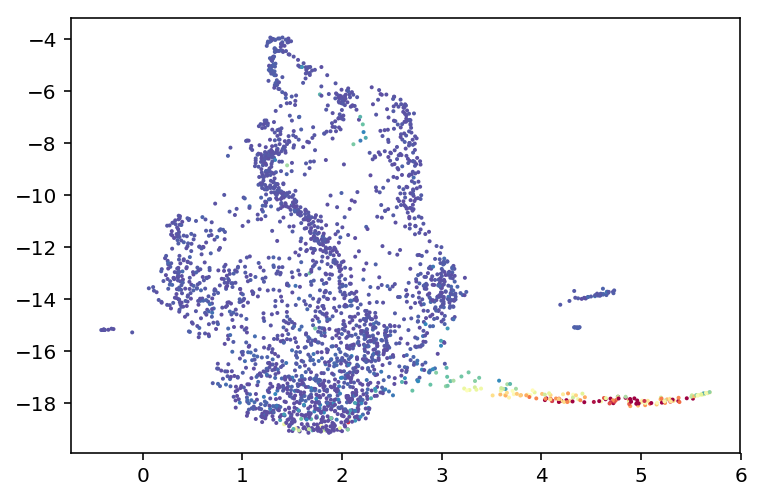

In [51]:
fig, ax = plt.subplots()
plot_colors = (np.add(q_norm["chr14.106"],0))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 1, c= -plot_colors, cmap='Spectral')
# both lymph

plt.show()


## By Mutation Proportion in "chr2.140"

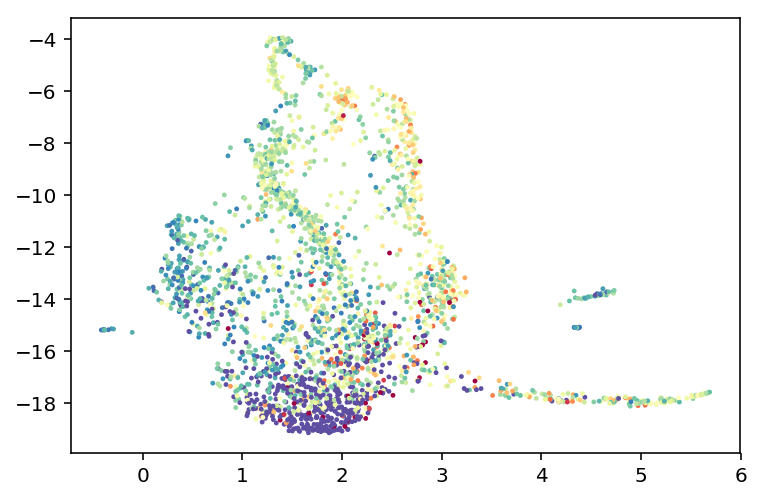

In [56]:
fig, ax = plt.subplots()
plot_colors = (np.add(q_norm["chr2.140"],1))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2, c= -plot_colors, cmap='Spectral')
# new colors

plt.show()


## By Mutation Proportion in "chr14.84"

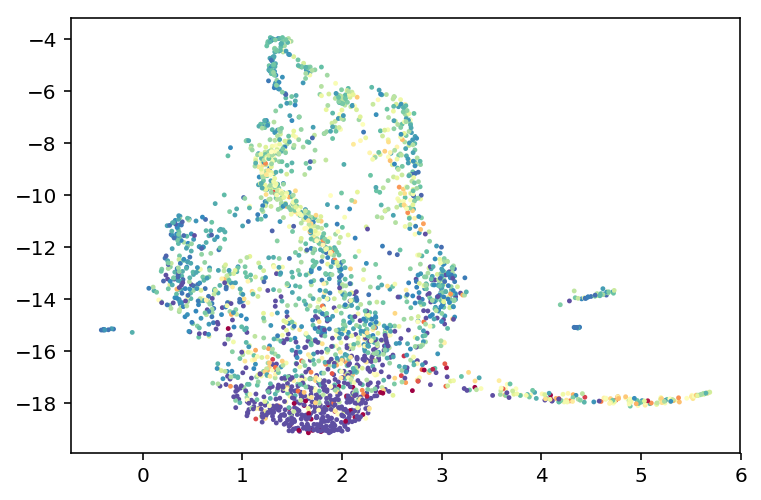

In [59]:
fig, ax = plt.subplots()
plot_colors = (np.add(q_norm["chr14.84"],0))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2, c=-plot_colors, cmap='Spectral')
# for liver

plt.show()


## By Mutation Proportion in "chr5.24

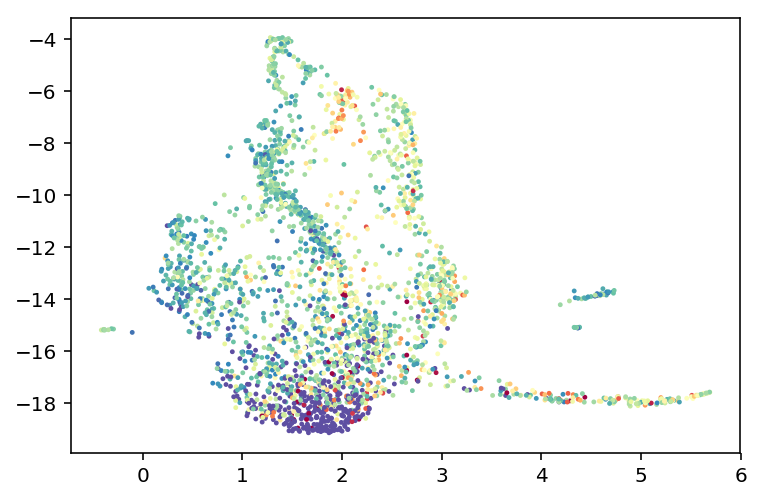

In [60]:
fig, ax = plt.subplots()
plot_colors = (np.add(q_norm["chr5.24"],0))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2, c= -plot_colors, cmap='Spectral')
# Ovary, lung scc

plt.show()


## By Mutation Proportion in "chr13.64"

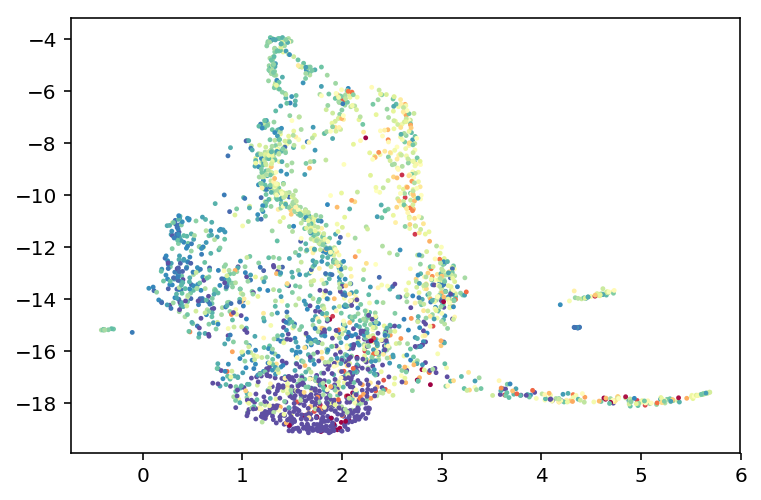

In [61]:
fig, ax = plt.subplots()
plot_colors = (np.add(q_norm["chr13.64"],0))
plot_colors[plot_colors > plot_colors.quantile(0.99)] = plot_colors.quantile(0.99)
ax.scatter(embedding[:, 0], embedding[:, 1],s= 2, c=-plot_colors, cmap='Spectral')
# Ovary, lung scc

plt.show()


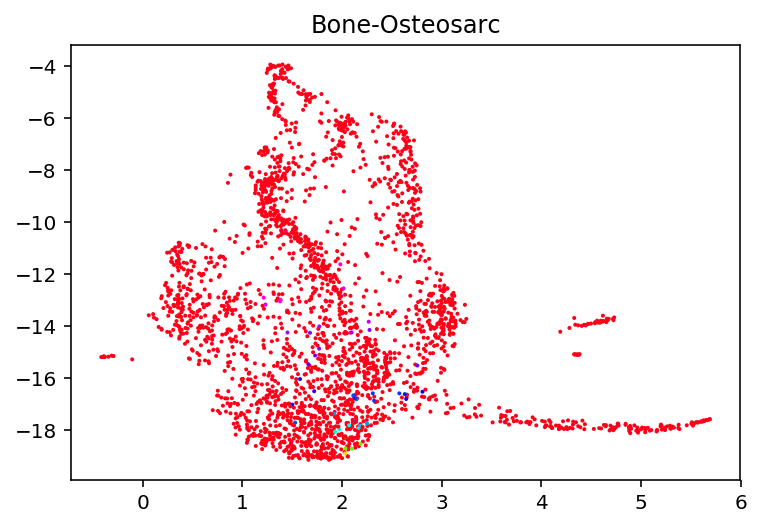

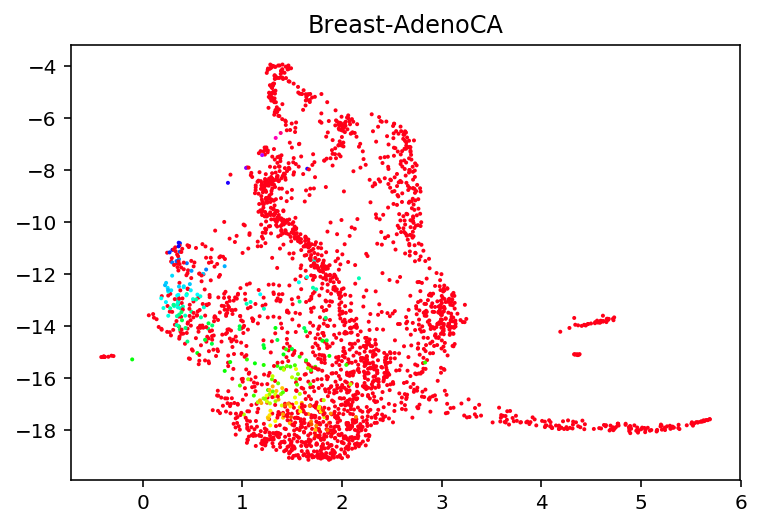

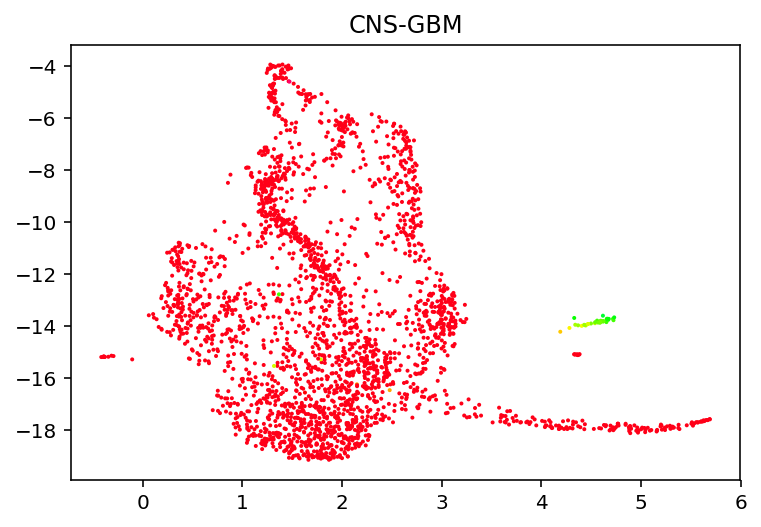

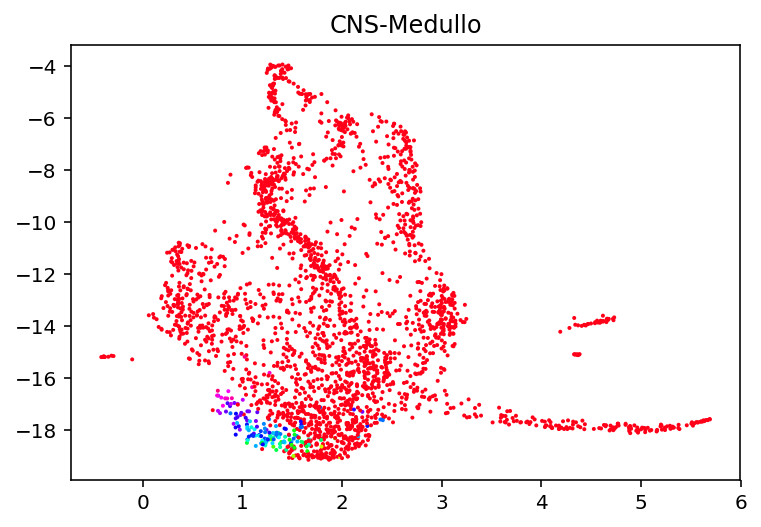

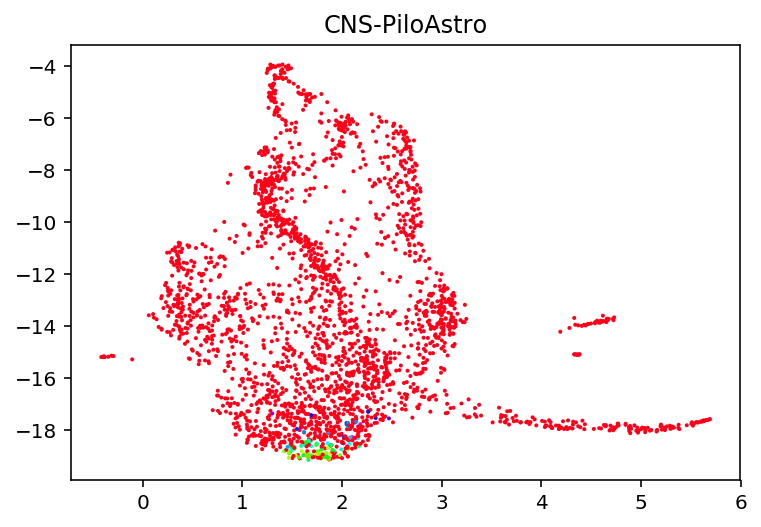

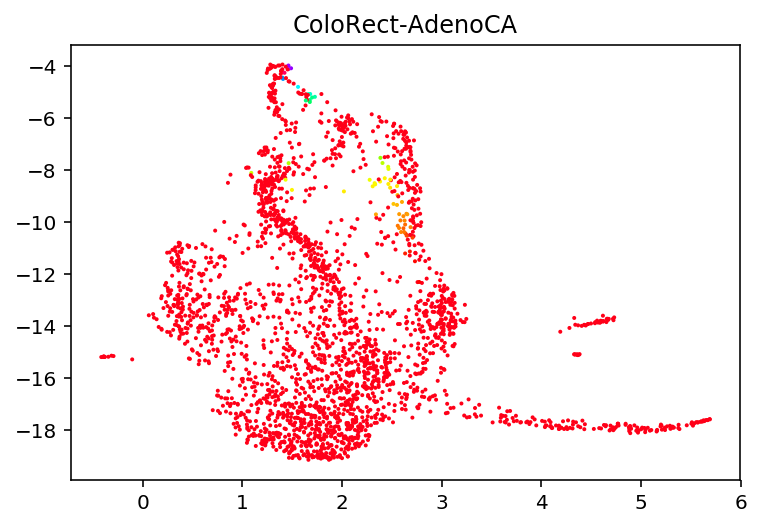

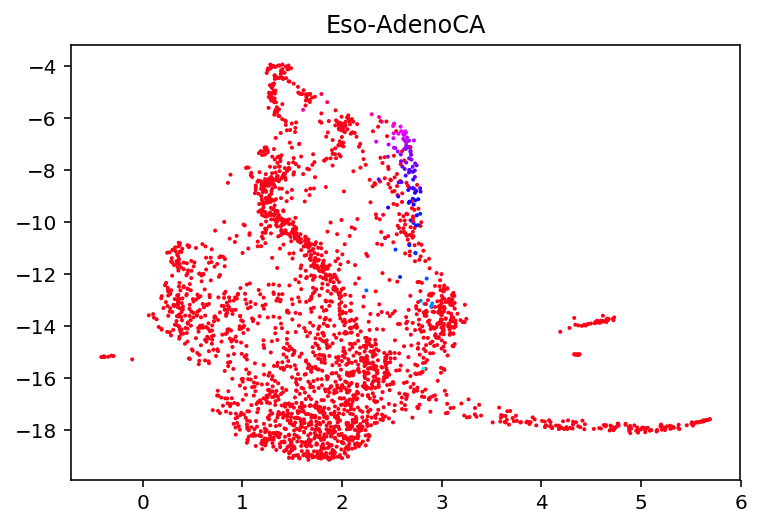

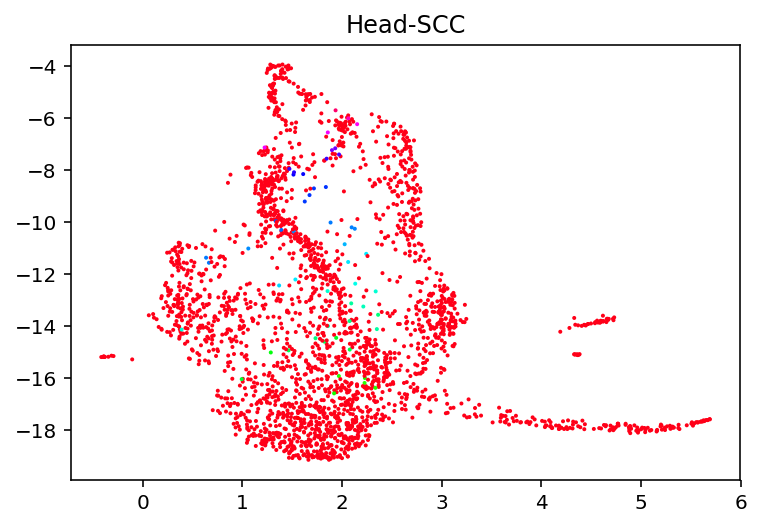

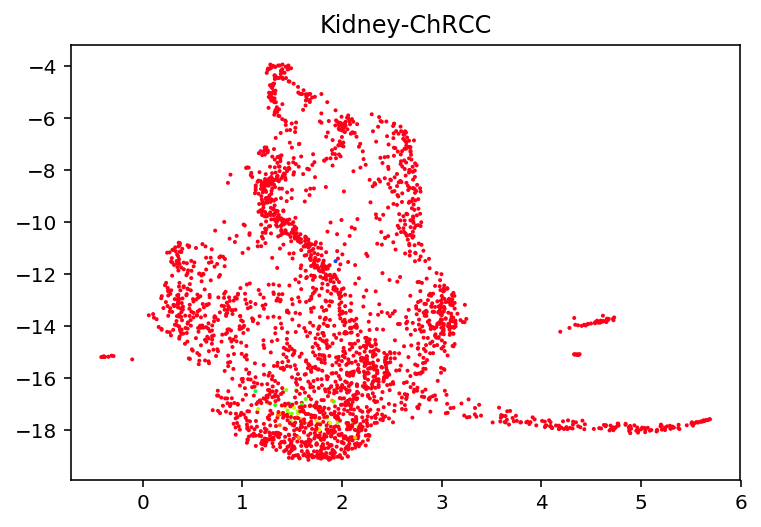

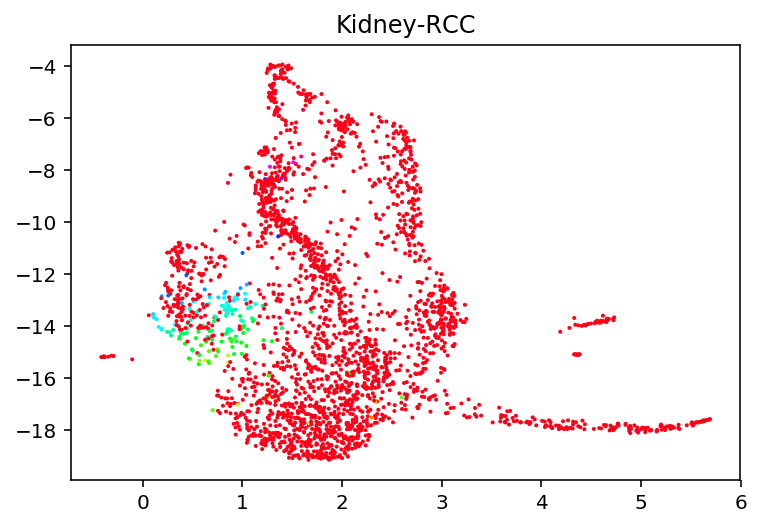

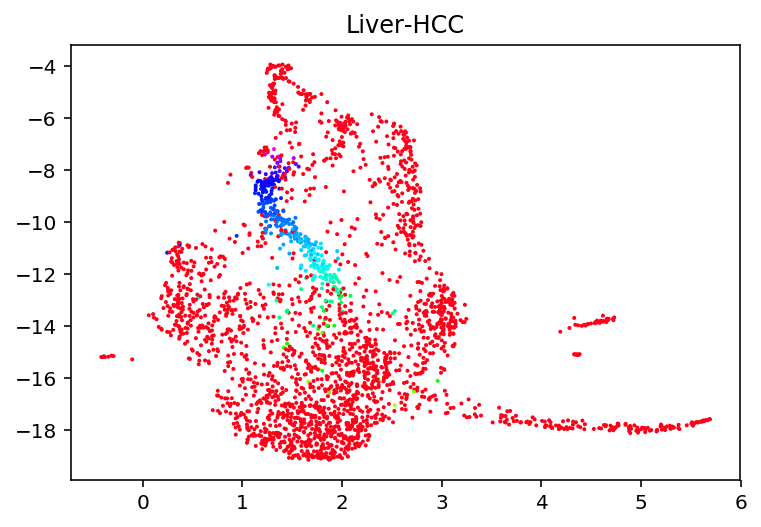

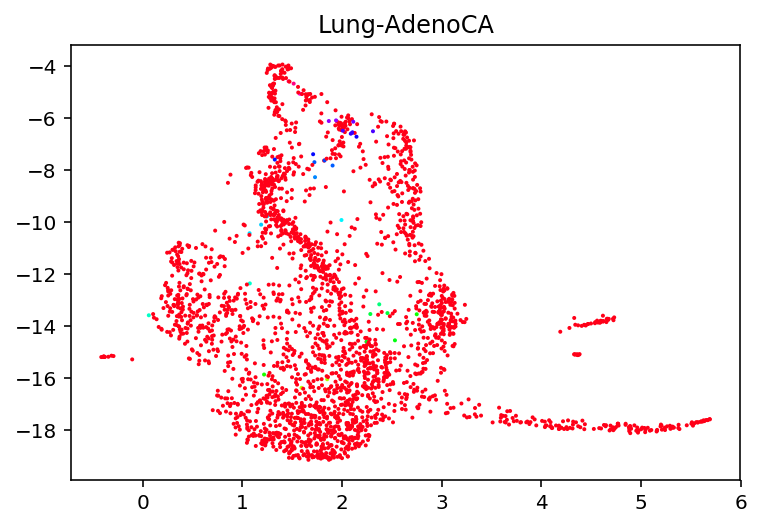

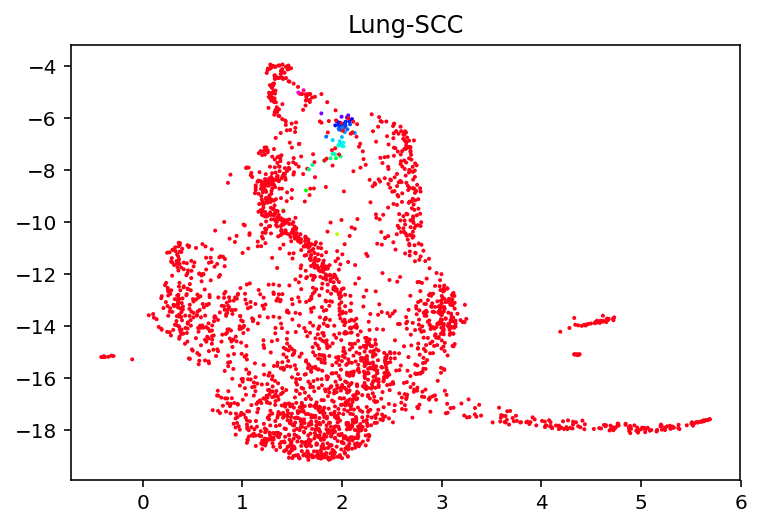

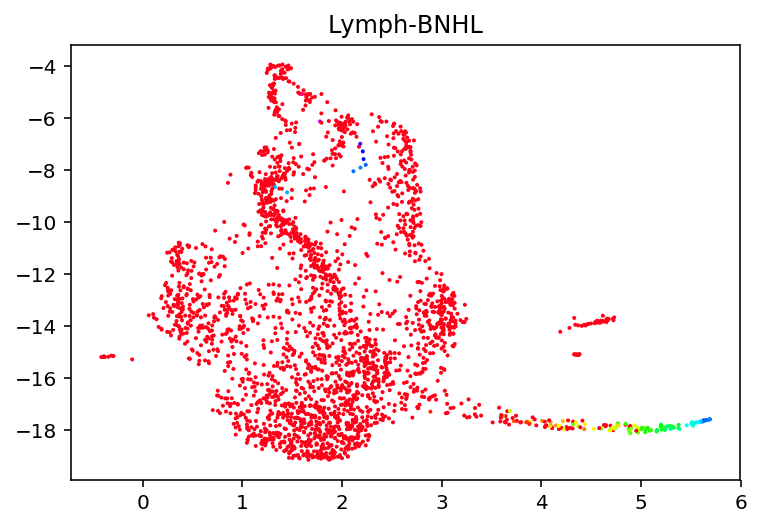

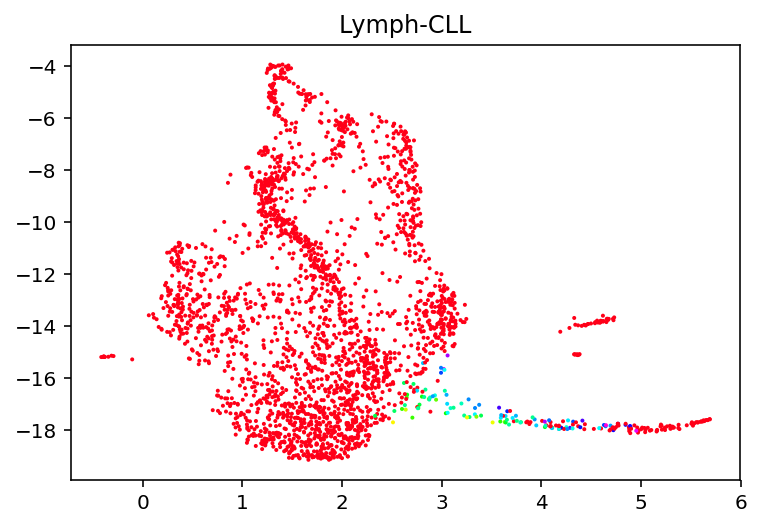

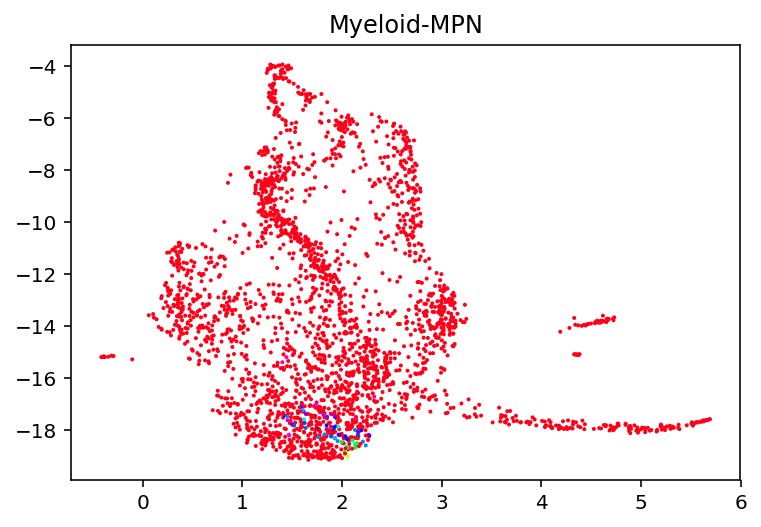

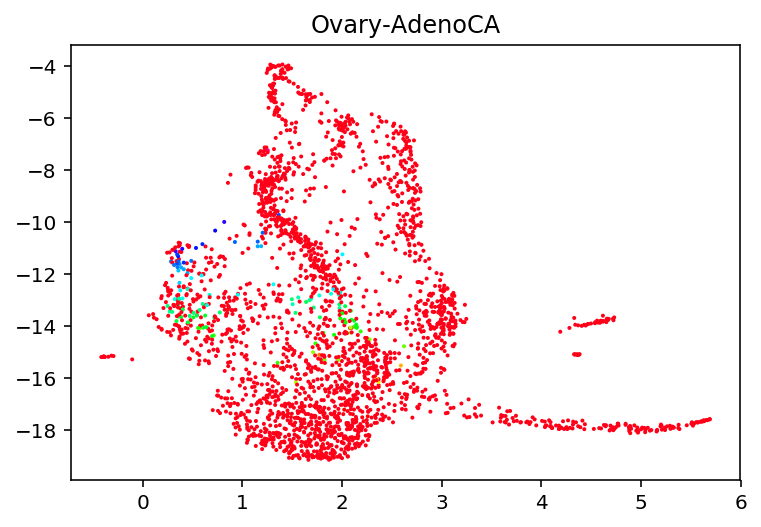

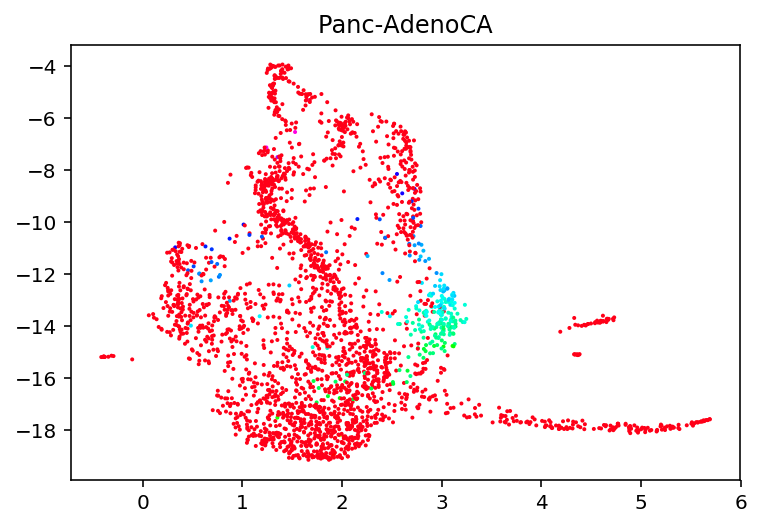

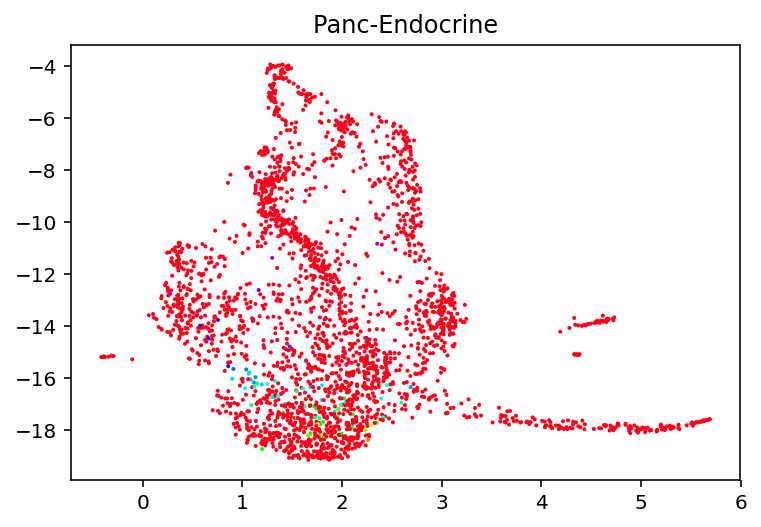

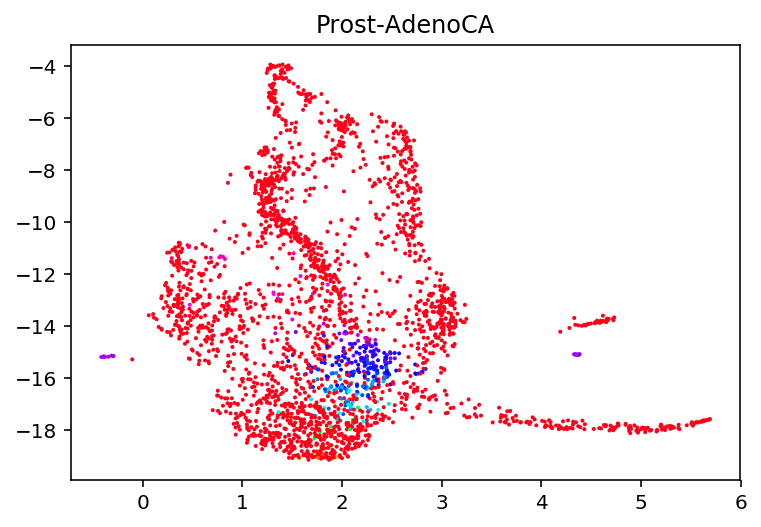

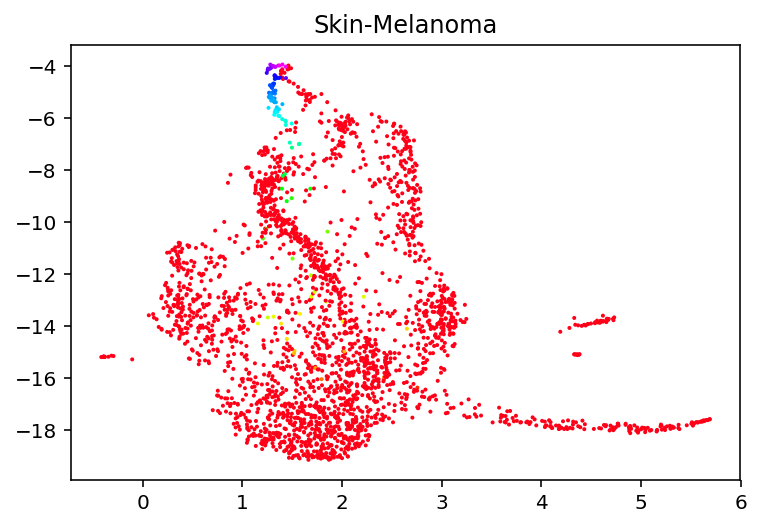

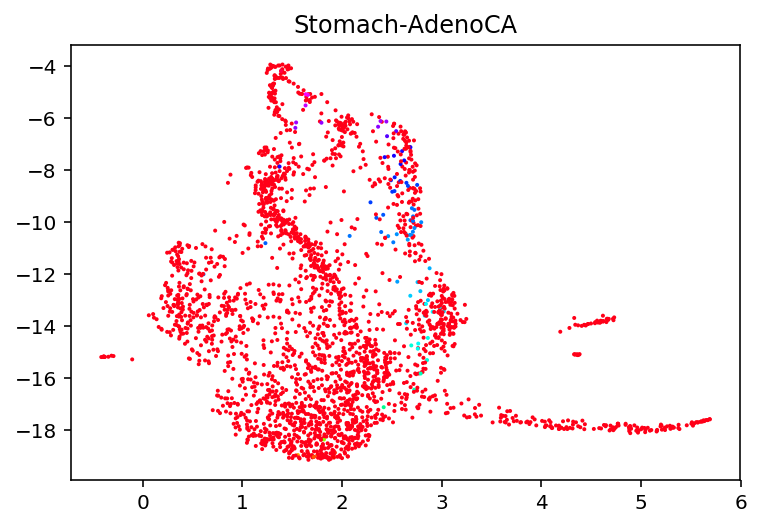

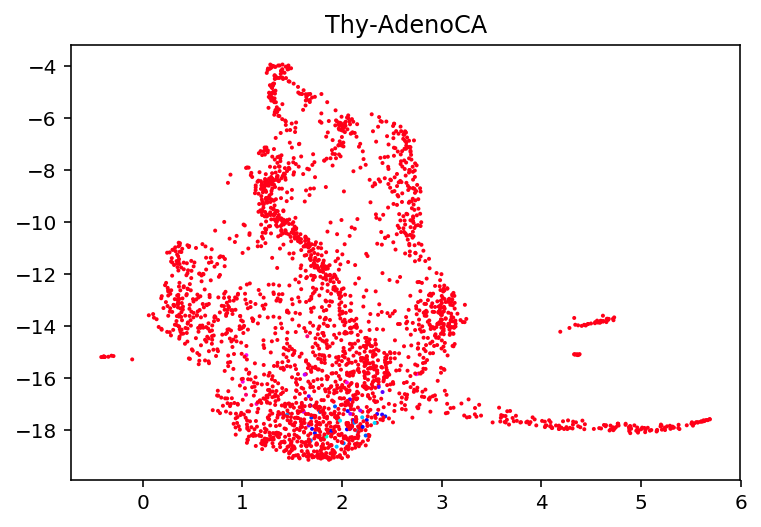

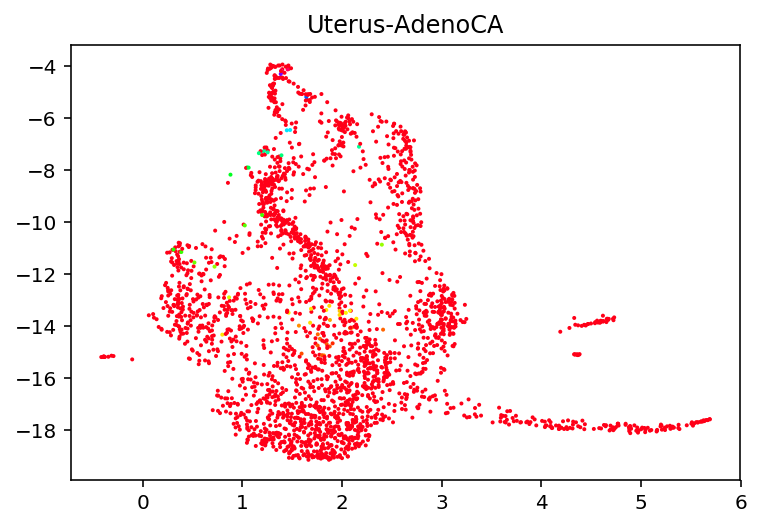

In [73]:
for cancer_class in le.classes_:
    fig, ax = plt.subplots()
    not_class = q[labels != cancer_class].index
    in_class = q[labels == cancer_class].index
    size_color = np.log(allsums)
    size_color[not_class] = max(size_color[in_class]) +0.3
    ax.scatter(embedding[:, 0], embedding[:, 1],s= 1,cmap='hsv', c=size_color)
    plt.title(cancer_class)
    plt.show()


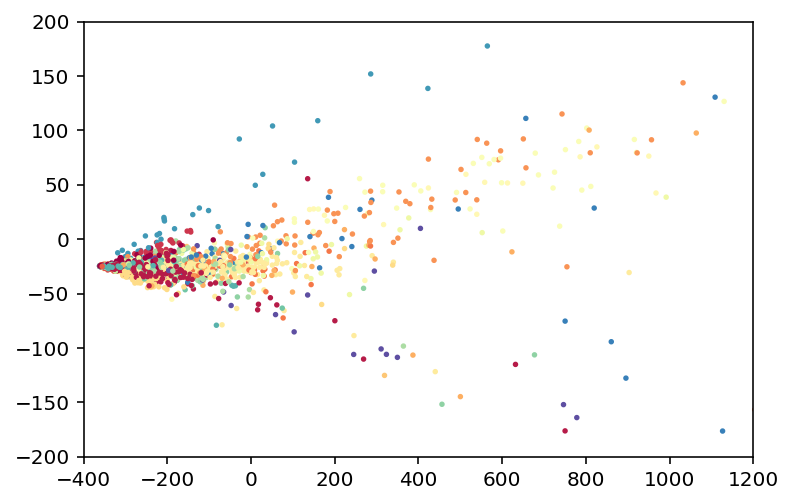

In [40]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(q)

plt.scatter(projected[:, 0], projected[:, 1],s= 3,cmap='Spectral', c=le.transform(labels.values))
plt.xlim(-400, 1200)
plt.ylim(-200, 200)

plt.show()

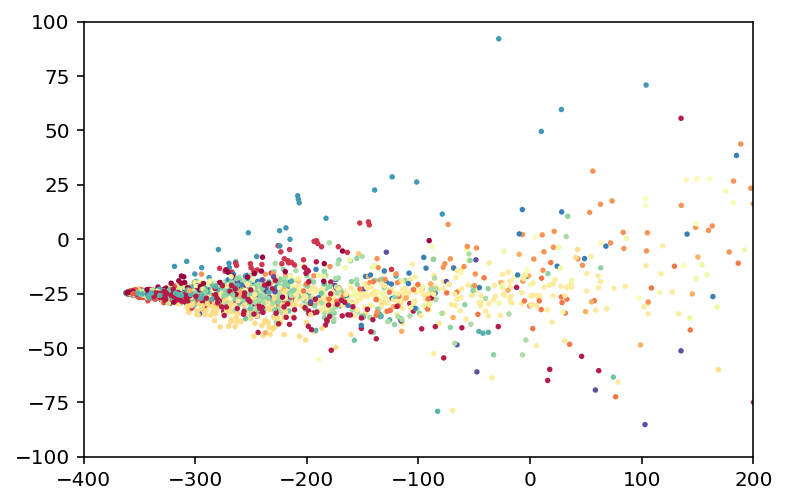

In [41]:
plt.scatter(projected[:, 0], projected[:, 1],s= 3,cmap='Spectral', c=le.transform(labels.values))
plt.xlim(-400, 200)
plt.ylim(-100, 100)

plt.show()